In [3]:
%matplotlib inline
import collections
import glob
import os
from matplotlib import pyplot as plt
from telicity.util import io
import seaborn as sns
import numpy as np
import pandas as pd

base_in_path = '/Users/thomas/DevSandbox/EpicDataShelf/tag-lab/multilingual_telicity'
base_out_path = '/Users/thomas/DevSandbox/EpicDataShelf/tag-lab/multilingual_telicity/_results'

### Create Heatmap from confusion matrix

_Note: In the confusion matrix, rows correspond to the **true** label and columns to the **predicted** label_

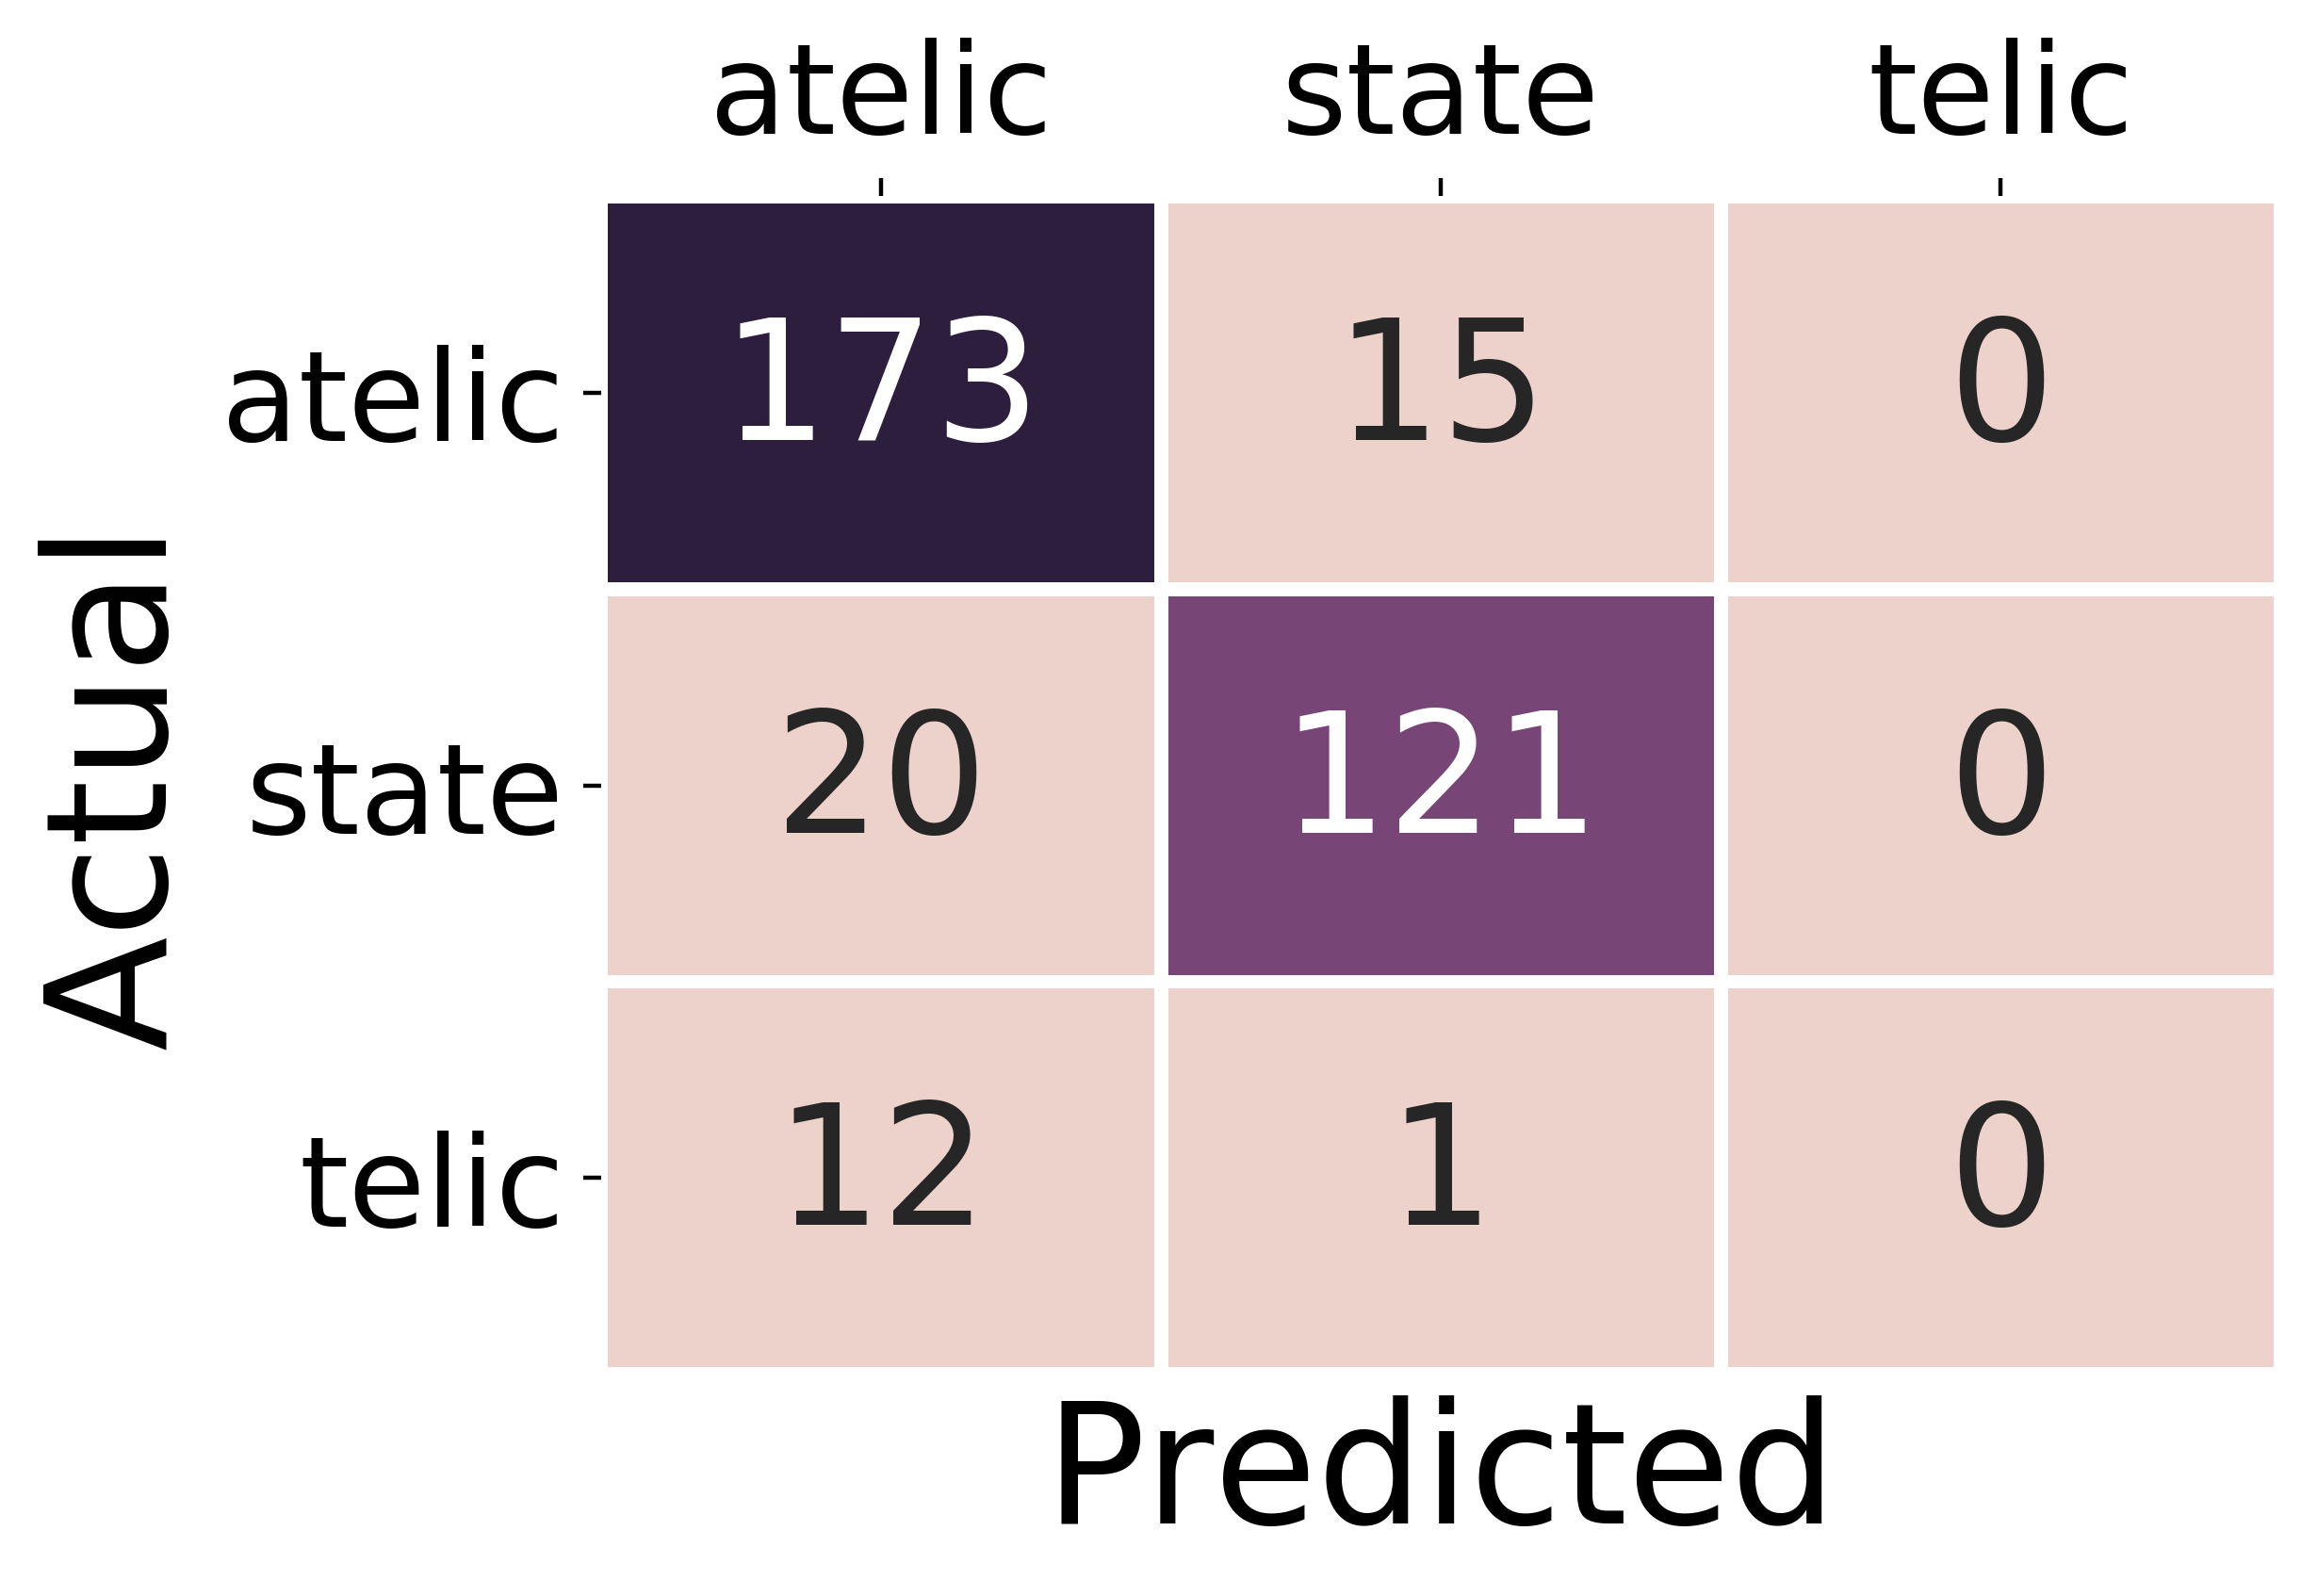

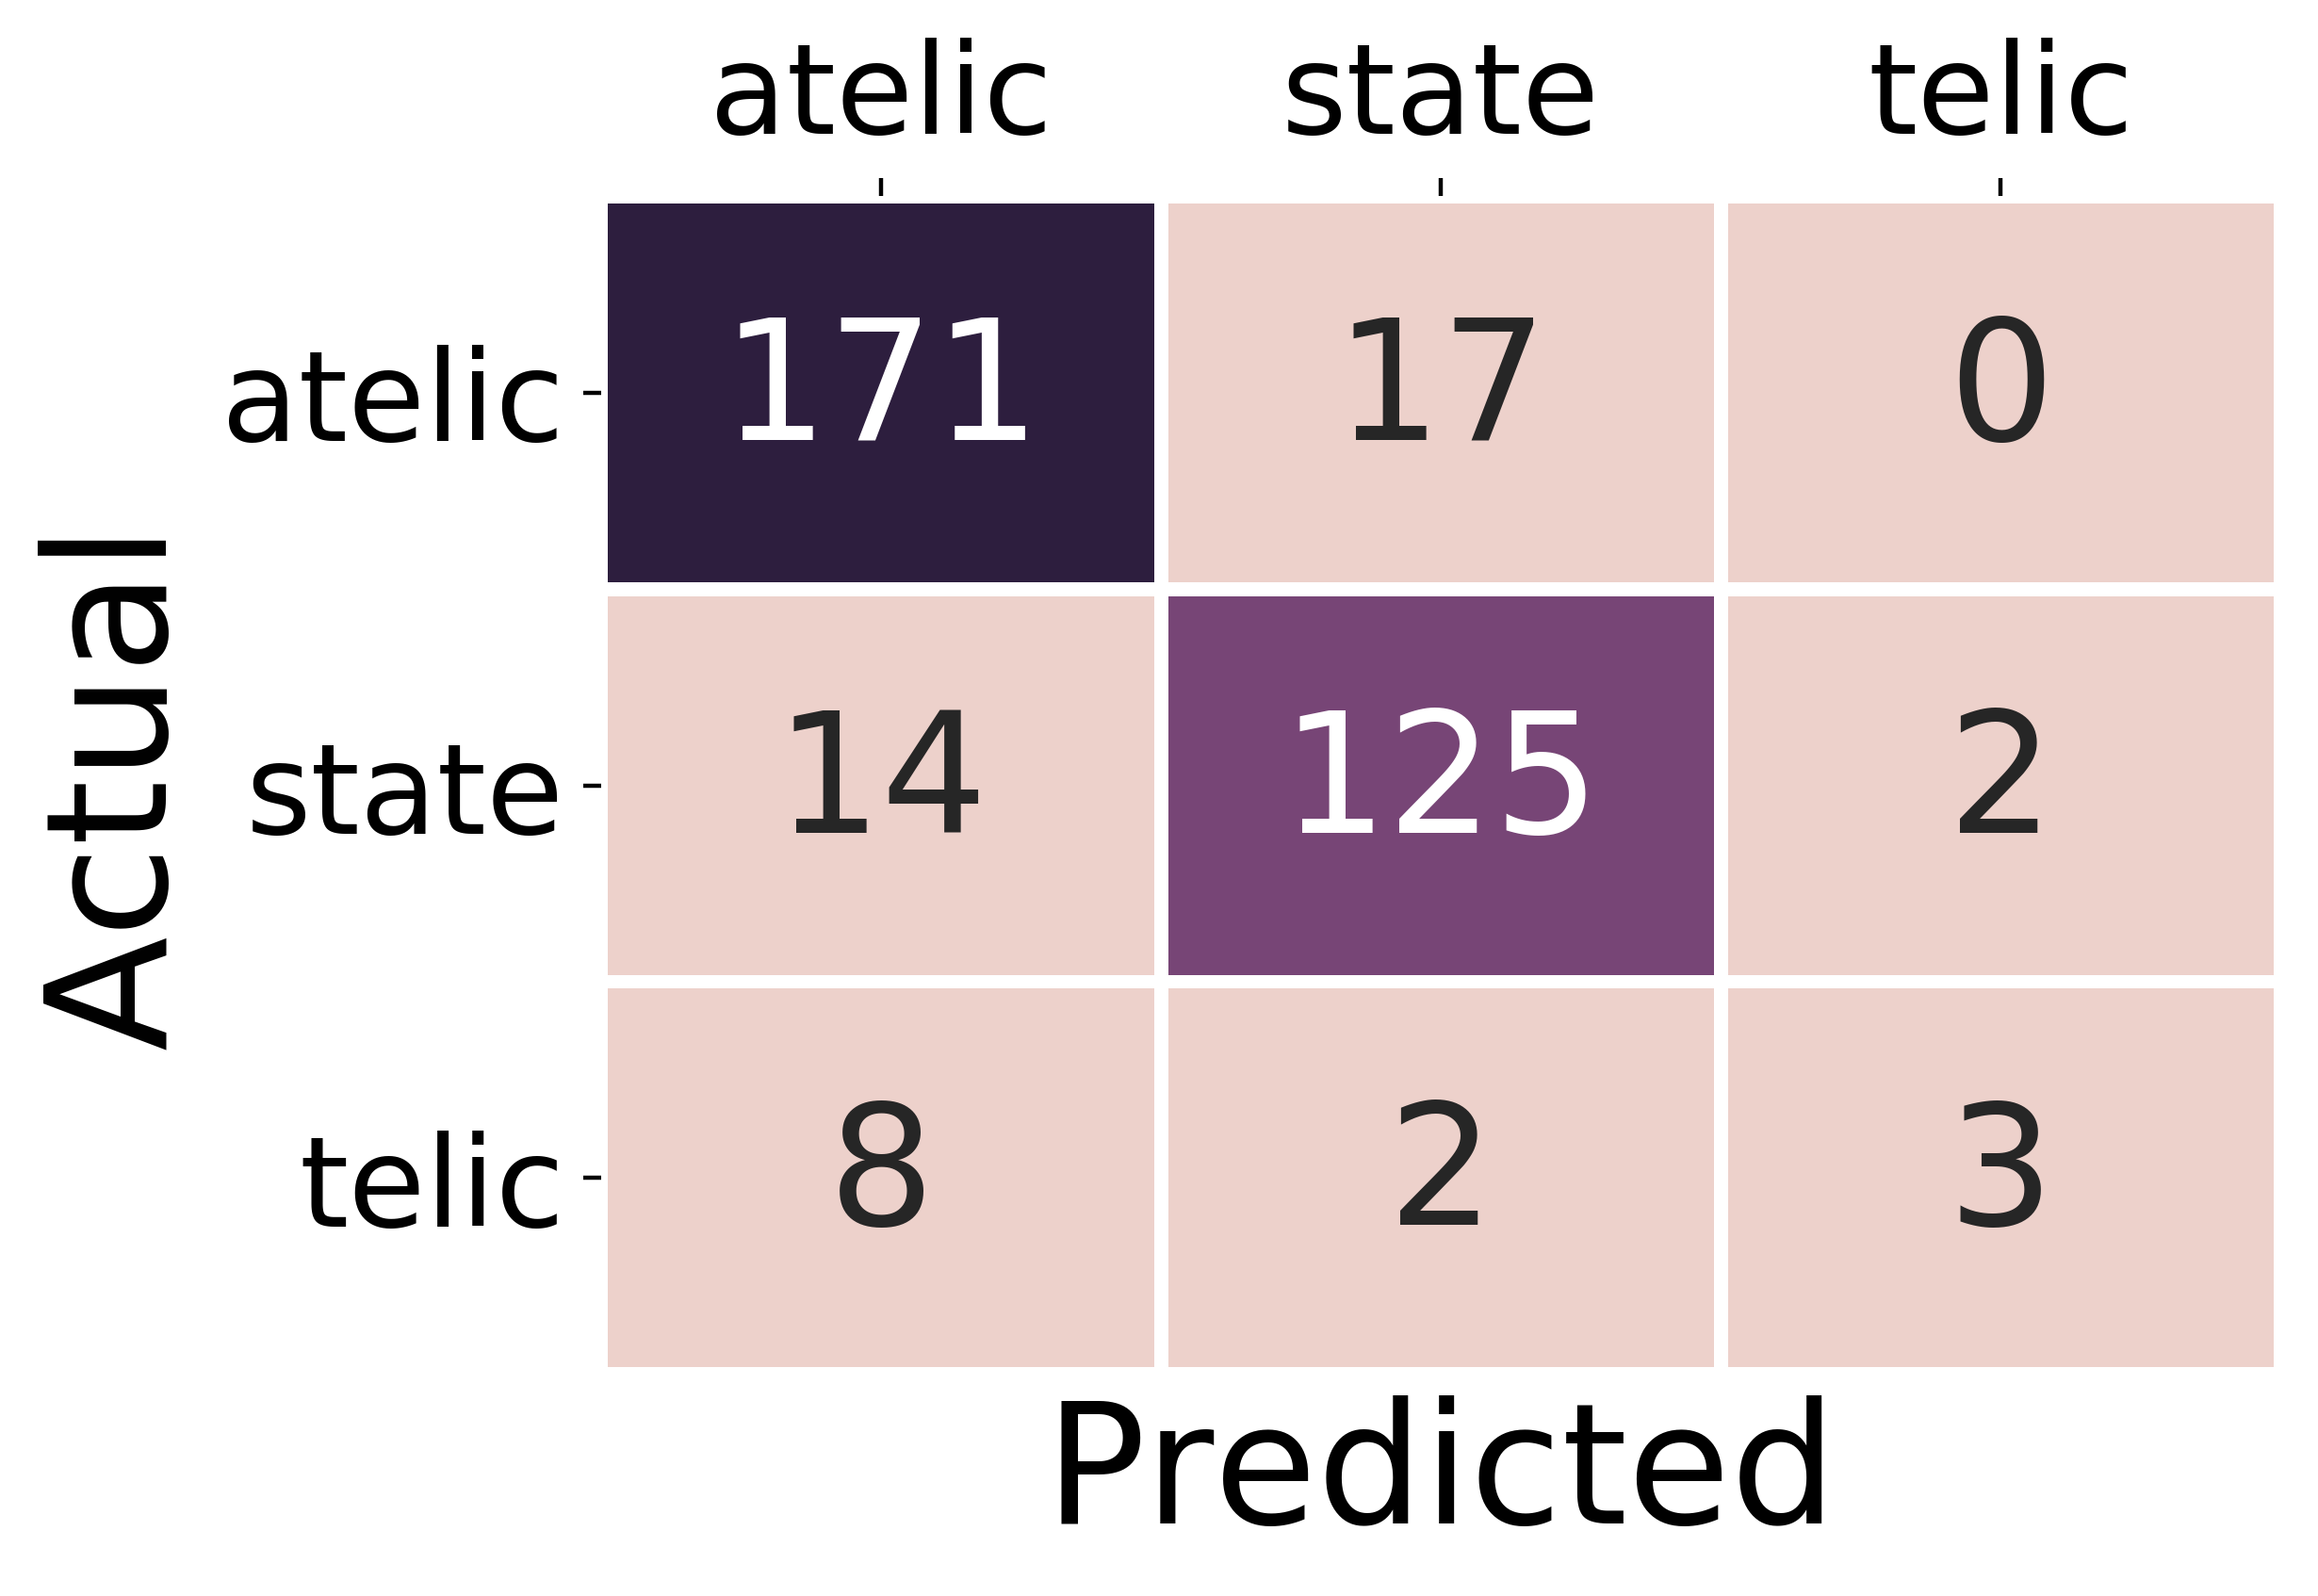

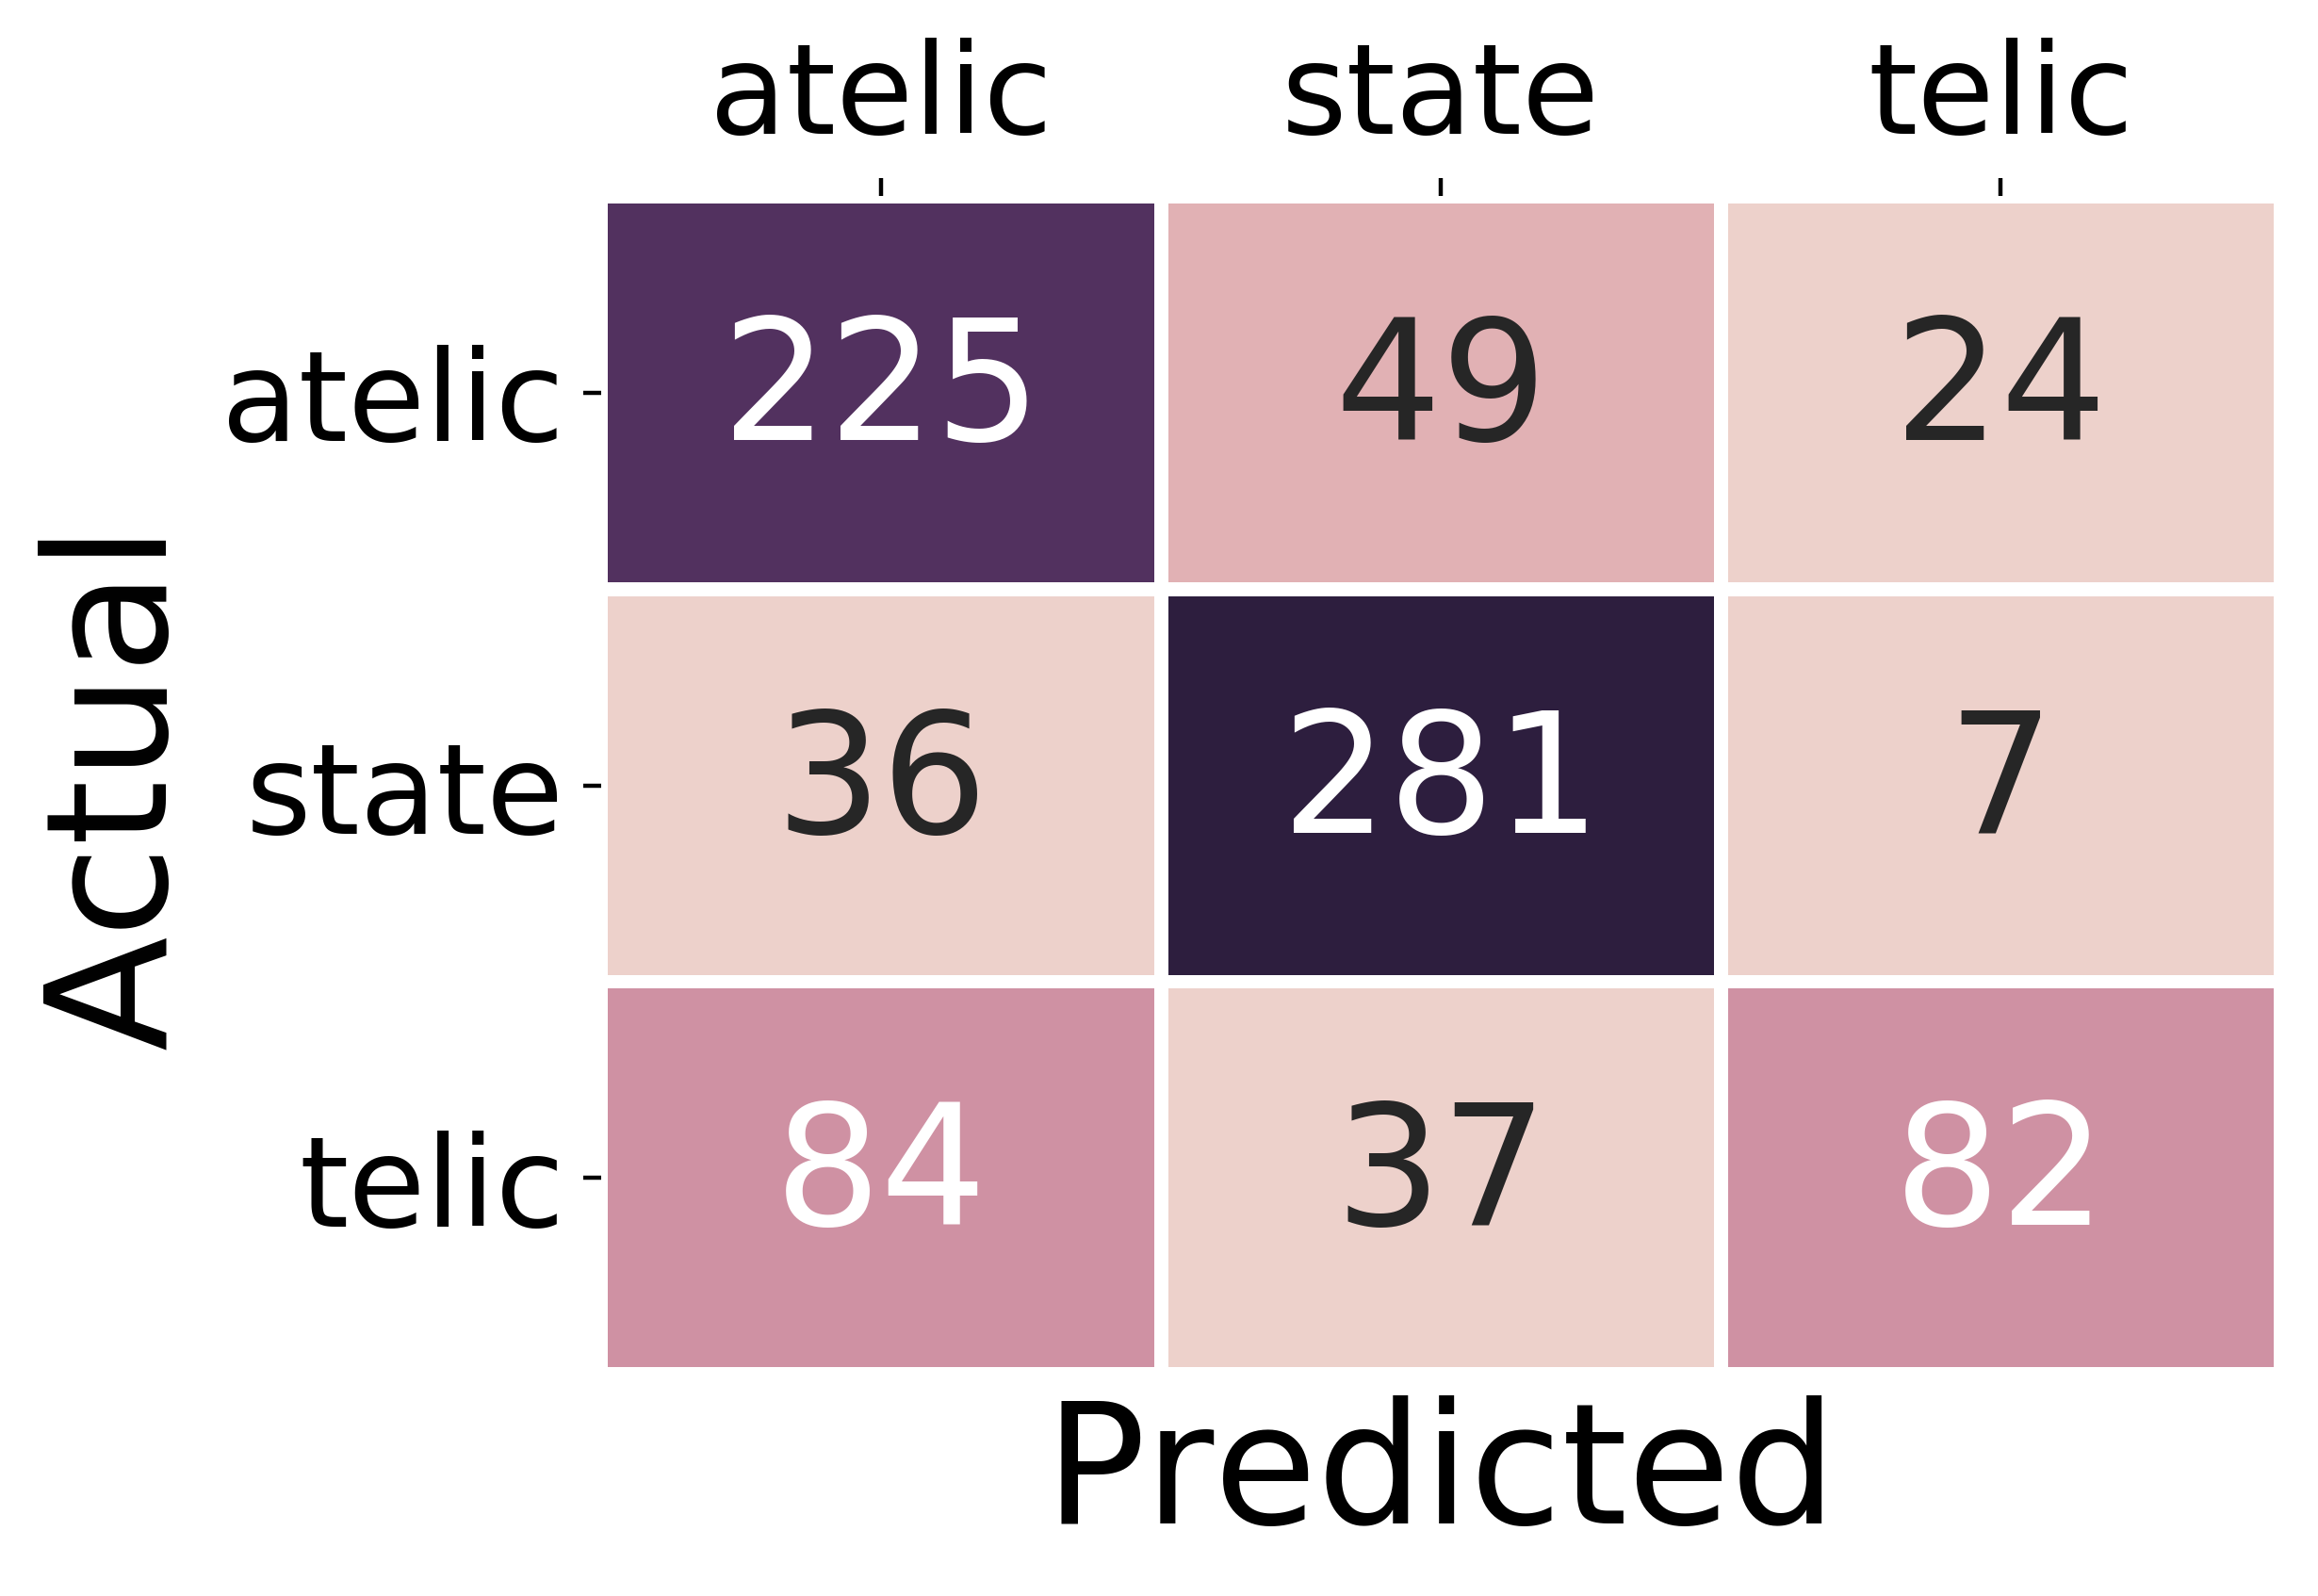

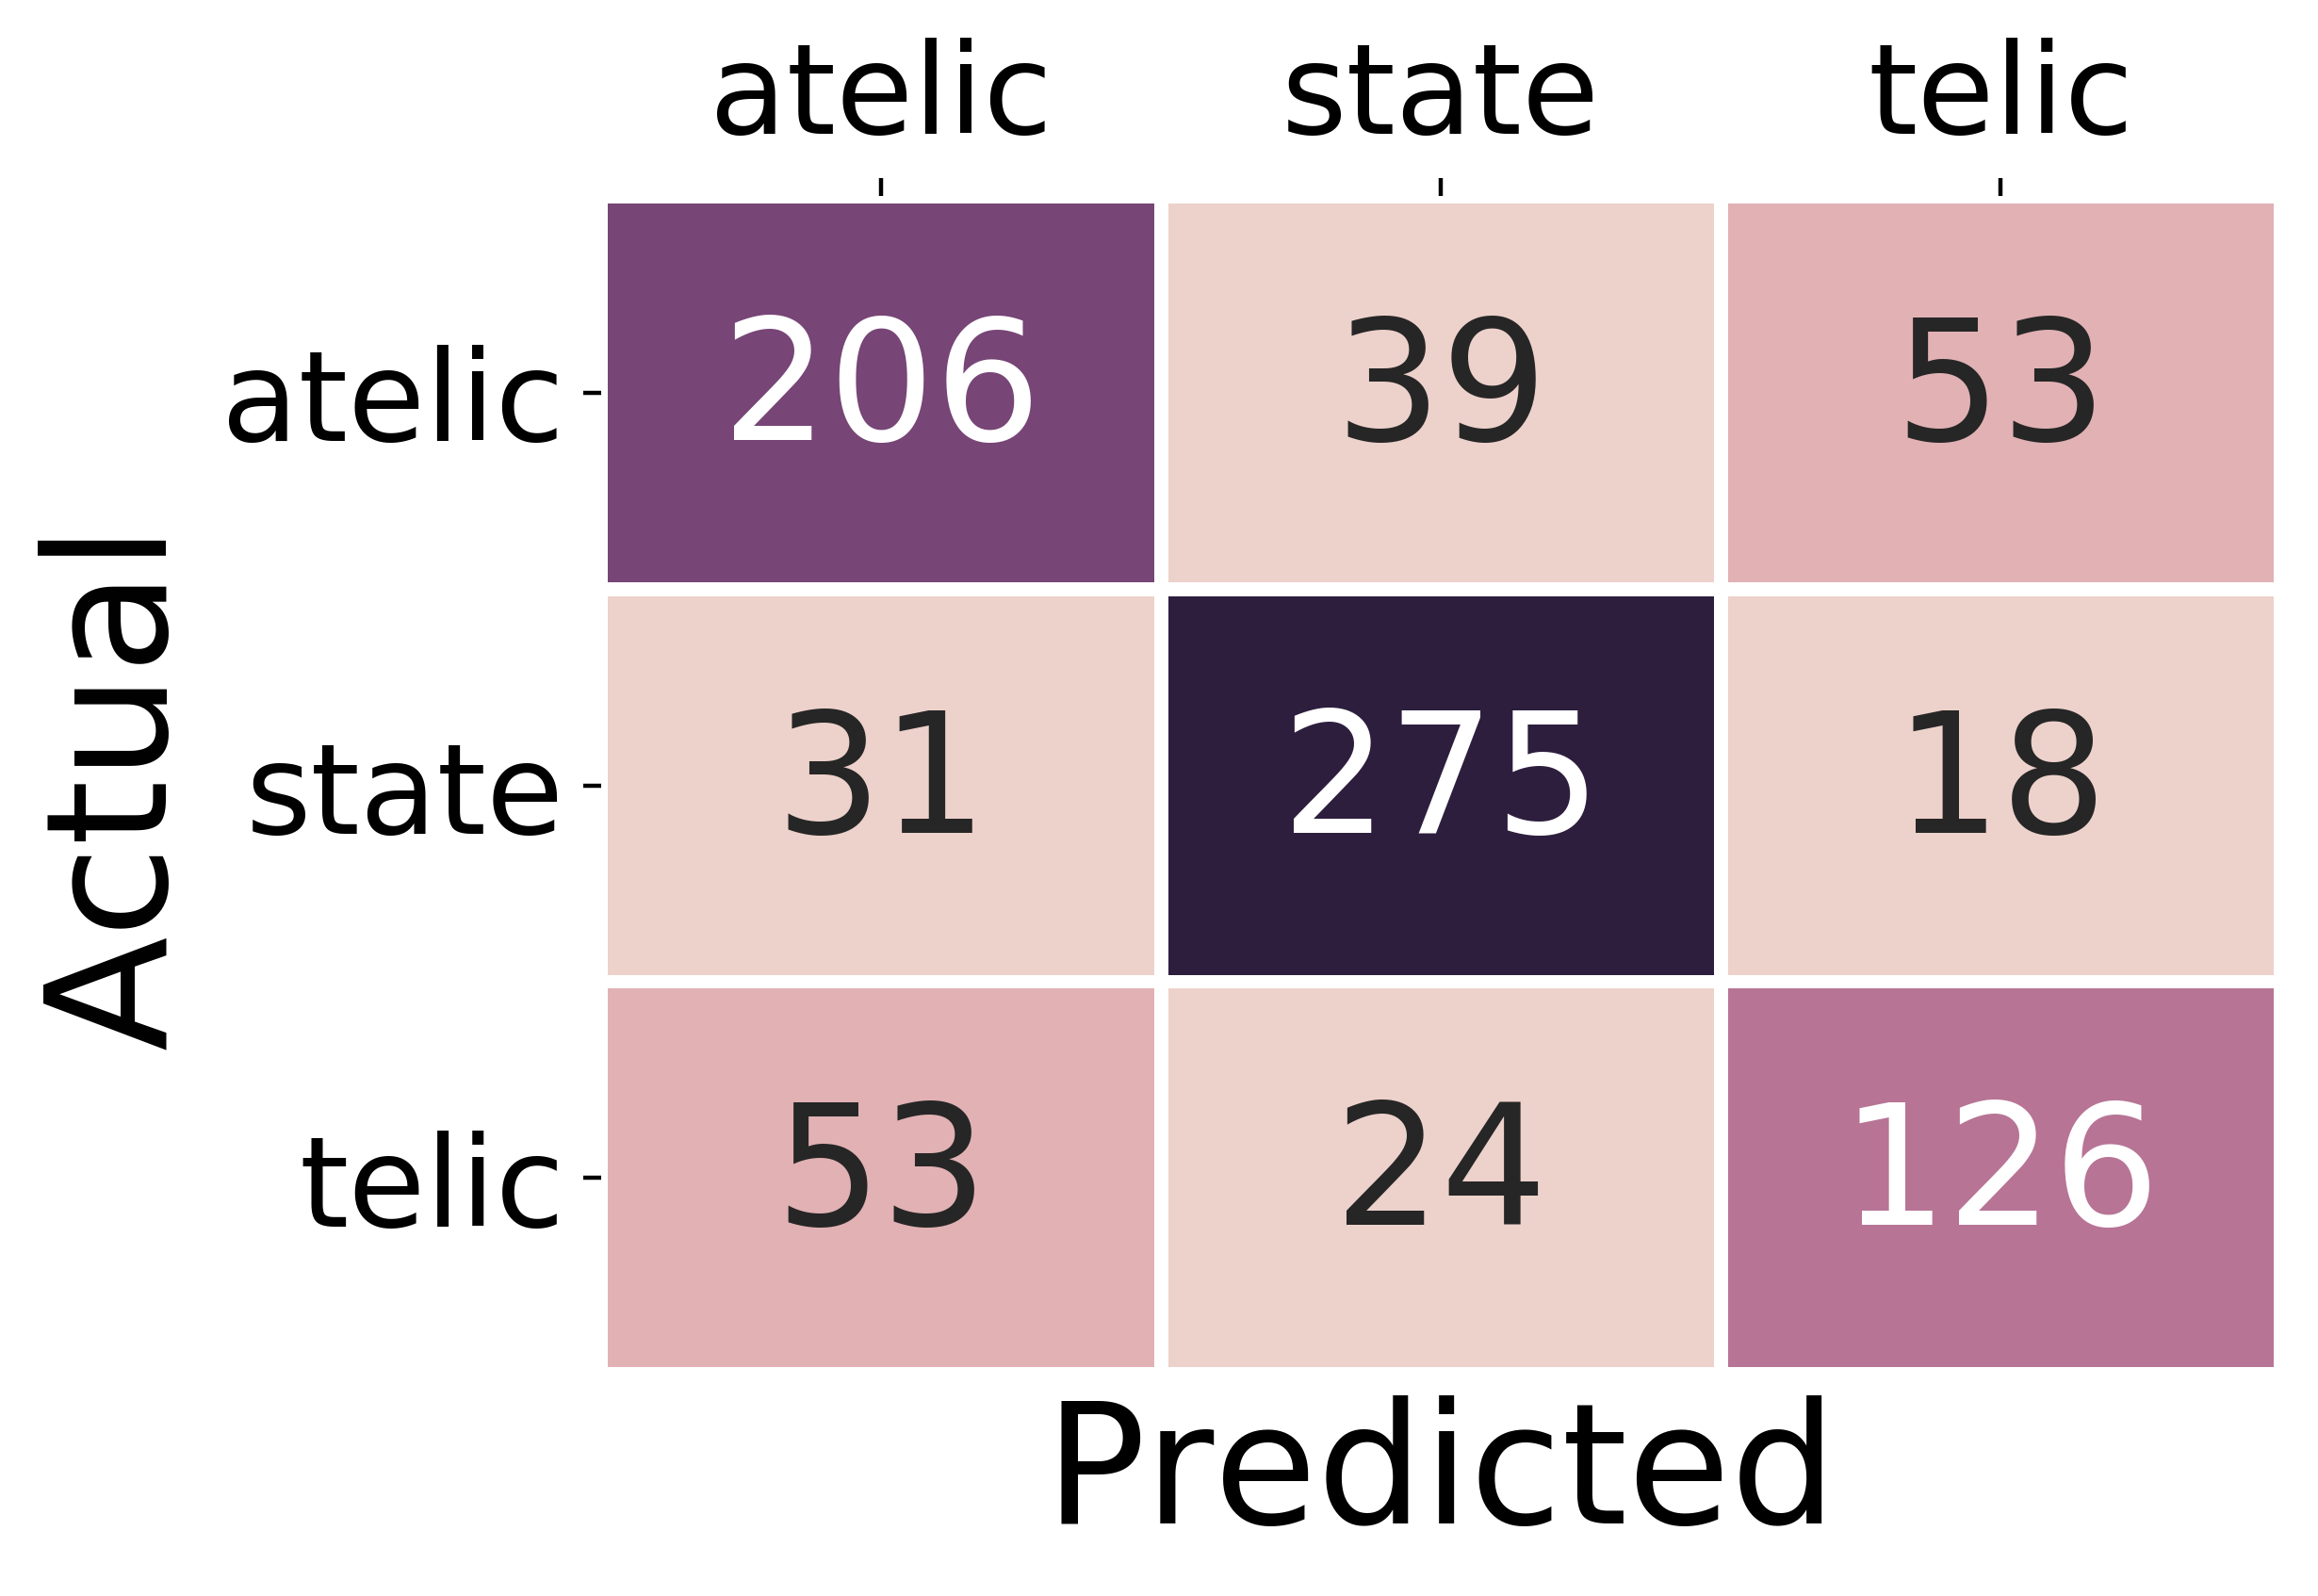

In [4]:
for cm_file in glob.glob(os.path.join(base_in_path, '*/confusion_matrix*.dill')):
    plot_file_name = os.path.split(cm_file)[1].replace('dill', 'png')
    cm_wrapped = io.load_structured_resource(cm_file)
    
    # Create pandas DataFrame from the confusion matrix data
    cm_columns = cm_wrapped['labels']
    cm_data = cm_wrapped['data']
    cm = {}
    for idx, col in enumerate(cm_columns):
        cm[col] = cm_data[idx]
    df_cm = pd.DataFrame.from_dict(cm, orient='index', columns=cm_columns)
    
    # Plot the confusion matrix as Heatmap
    fig = plt.figure(figsize=(5.75, 4.14), dpi=400, facecolor='w', edgecolor='k')
    
    ax = sns.heatmap(df_cm, annot=True, linewidths=2.5, fmt='d', cmap=sns.cubehelix_palette(8), annot_kws={'fontdict': {'size': 32}}, cbar=False)
    
    ax.xaxis.set_ticks_position('top')
    ax.set_xlabel('Predicted', fontsize=32)
    ax.set_ylabel('Actual', fontsize=32)
    ax.set_xticklabels(ax.get_xticklabels(), size=24)
    ax.set_yticklabels(ax.get_yticklabels(), size=24, rotation=0)
    
    plt.savefig(os.path.join(base_out_path, plot_file_name), bbox_inches='tight') 